/var/folders/3f/5b_39xqs2tlgzd30m4ll014r0000gn/T/ipykernel_92523/1439582194.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10')


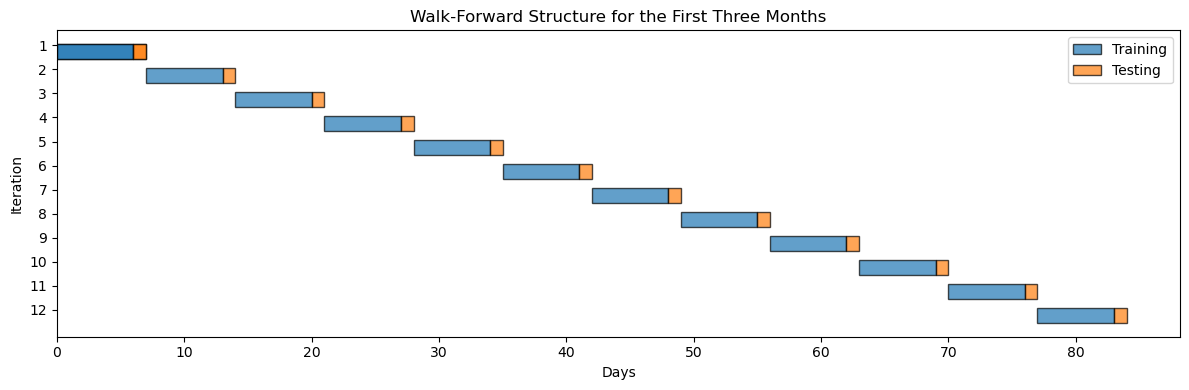

In [78]:
import matplotlib.pyplot as plt
import numpy as np

# Simulated data for demonstration
days_in_month = 30
training_days = 6
testing_day = 1
days_per_iteration = 7
num_iterations = (days_in_month * 3) // days_per_iteration

# Initialize plot
fig, ax = plt.subplots(figsize=(12, 4))

# Create a colormap for alternating colors
cmap = plt.cm.get_cmap('tab10')
colors = [cmap(i) for i in range(2)]

# Generate the Gantt chart-like blocks with light red gaps
for i in range(num_iterations):
    x_start = i * days_per_iteration
    x_end = x_start + training_days + testing_day
    color_idx = i % 2
    
    y_train = (num_iterations - i - 1) * 0.5
    y_test = (num_iterations - i - 1) * 0.5 
    
    # Place vertical bars from y-axis at specified heights
    plt.barh(y_train, training_days, height=0.3, left=x_start, color=colors[0], alpha=0.7, edgecolor='black')
    plt.barh(y_test, testing_day, height=0.3, left=x_end - testing_day, color=colors[1], alpha=0.7, edgecolor='black')

    if i == 0:
        # add legends for training and testing
        plt.barh(y_train, training_days, height=0.3, left=x_start, color=colors[0], alpha=0.7, edgecolor='black', label='Training')
        plt.barh(y_test, testing_day, height=0.3, left=x_end - testing_day, color=colors[1], alpha=0.7, edgecolor='black', label='Testing')
        plt.legend(loc='upper right')

plt.yticks(np.arange(0, num_iterations) * 0.5 + 0.125, np.arange(1, num_iterations + 1)[::-1])
plt.xlabel('Days')
plt.ylabel('Iteration')
plt.title('Walk-Forward Structure for the First Three Months')
plt.tight_layout()
plt.show()


In [1]:
import torch
import sys
import os 
sys.path.append(os.path.abspath('../..'))

from data import PVWeatherGenerator

In [2]:
# data parameters
DAY_INIT = 0
DAY_MIN = 8
DAY_MAX = 16
N_DAYS = 365
MINUTE_INTERVAL = 5
DAILY_DATA_POINTS = (DAY_MAX - DAY_MIN) * 60 // MINUTE_INTERVAL
N_DAYS_FOLD = 8
N_SYSTEMS = 10
CIRCLE_COORDS = (53.5, -3)
RADIUS = 0.4


In [3]:
generator = PVWeatherGenerator(
    coords=CIRCLE_COORDS,
    radius=RADIUS,
    day_init=DAY_INIT,
    n_systems=N_SYSTEMS,
    n_days=N_DAYS,
    minute_interval=MINUTE_INTERVAL,
)

==> Loading data
==> Loaded data in: 0 m : 19 sec



In [4]:
interval = int(DAILY_DATA_POINTS * N_DAYS_FOLD)

In [6]:
from data import SystemLoader
loader = SystemLoader(generator.df, train_interval=interval)


In [7]:
# number of points for each individual system
print(f'Points per system: {loader.tasks[loader.tasks == 0].shape[0]}')
# total number of points
print(f'Total points: {loader.tasks.shape[0]}')

Points per system: 35040
Total points: 350400


start index: 27648 | end index: 28416


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


start index: 28416 | end index: 29184


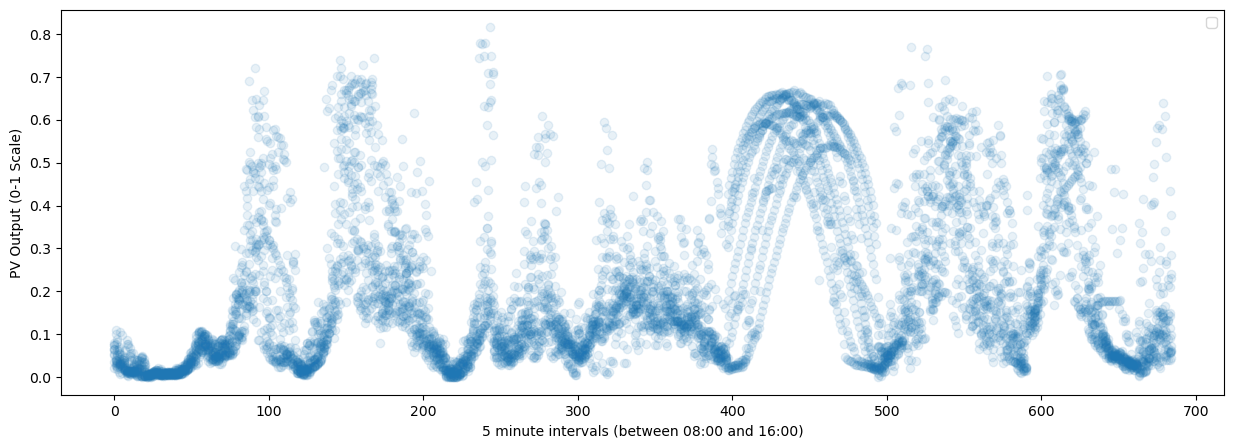

In [45]:
from matplotlib import pyplot as plt
import numpy as np
fig, ax = plt.subplots(1, 1, figsize=(15, 5))



print(f"start index: {loader.start} | end index: {loader.end}")
for X_tr, Y_tr, X_te, Y_te, T_tr, T_te in loader:

    for i in range(loader.n_systems):
        x_tr, y_tr, x_te, y_te = loader.train_test_split_individual(i)
        n_tr, n_te = x_tr.shape[0], x_te.shape[0]
        t_tr, t_te = torch.arange(n_tr), torch.arange(n_tr, n_tr+n_te)
        
        # concetenate train and test
        t = torch.cat([t_tr, t_te])
        y = torch.cat([y_tr, y_te])
        # set color to the tab10 blue
        ax.scatter(t, y, alpha=0.1, color='tab:blue')
    
    ax.set_xlabel('5 minute intervals (between 08:00 and 16:00)')
    ax.set_ylabel('PV Output (0-1 Scale)')
    ax.legend()
       
        
    # updated slicing
    print(f"start index: {loader.start} | end index: {loader.end}")
    break

    
    